<h1 style="text-align:center; color:purple; font-size:60px;">
    Paradox Test File
</h1>


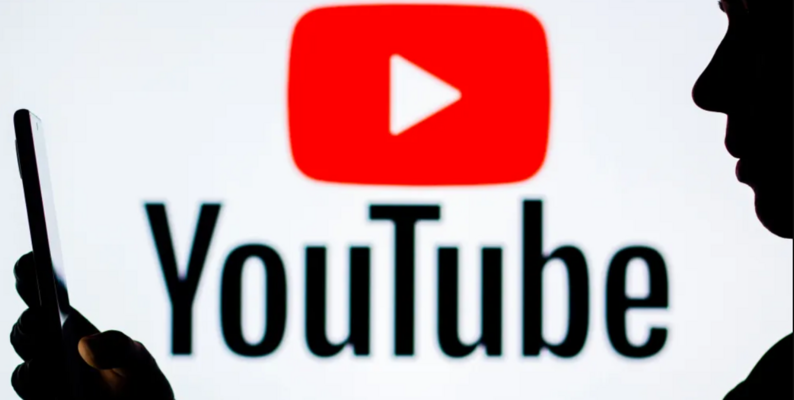

### Importing libraries

In [1]:
import pickle
import pandas as pd
import re
from nltk.stem import PorterStemmer

### Loading the saved models

In [2]:
with open("Trained_Model.pkl", "rb") as f:
    model = pickle.load(f)
with open("tfidf_transformer.pkl", "rb") as f:
    tfidf = pickle.load(f)
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

### Preprocessing and cleaning

In [3]:
ps = PorterStemmer()

def clean_and_stem_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    text = ' '.join(ps.stem(word) for word in text.split())  # Stemming
    return text

### Creating a function to predict the category

In [4]:
def predict_comment_category(comment):
    cleaned_comment = clean_and_stem_text(comment)

    X_test = tfidf.transform([cleaned_comment])
    y_pred = model.predict(X_test)

    predicted_category = label_encoder.inverse_transform(y_pred)
    return predicted_category[0]

 ### Getting user input and predicting the category

In [5]:
if __name__ == "__main__":
    user_comment = input("Enter a comment: ")
    category = predict_comment_category(user_comment)
    print("Predicted Category:", category)

Enter a comment: what is the answer to question 1?
Predicted Category: doubt


## Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)

### [Muhammed Ashrah](https://www.linkedin.com/in/muhammed-ashrah)